In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [58]:
dataset=pd.read_csv("Housing.csv")
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

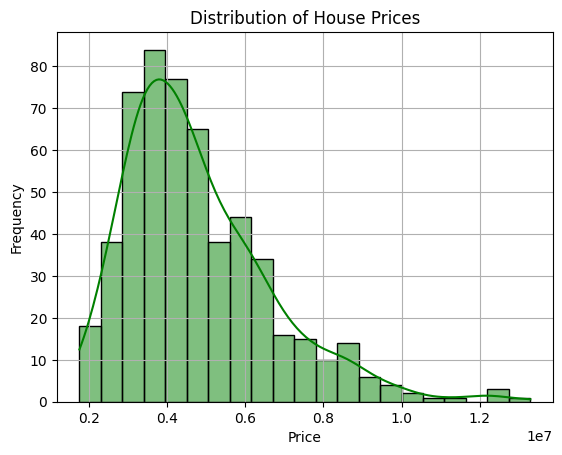

In [61]:
sns.histplot(dataset["price"], kde=True, color="green")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


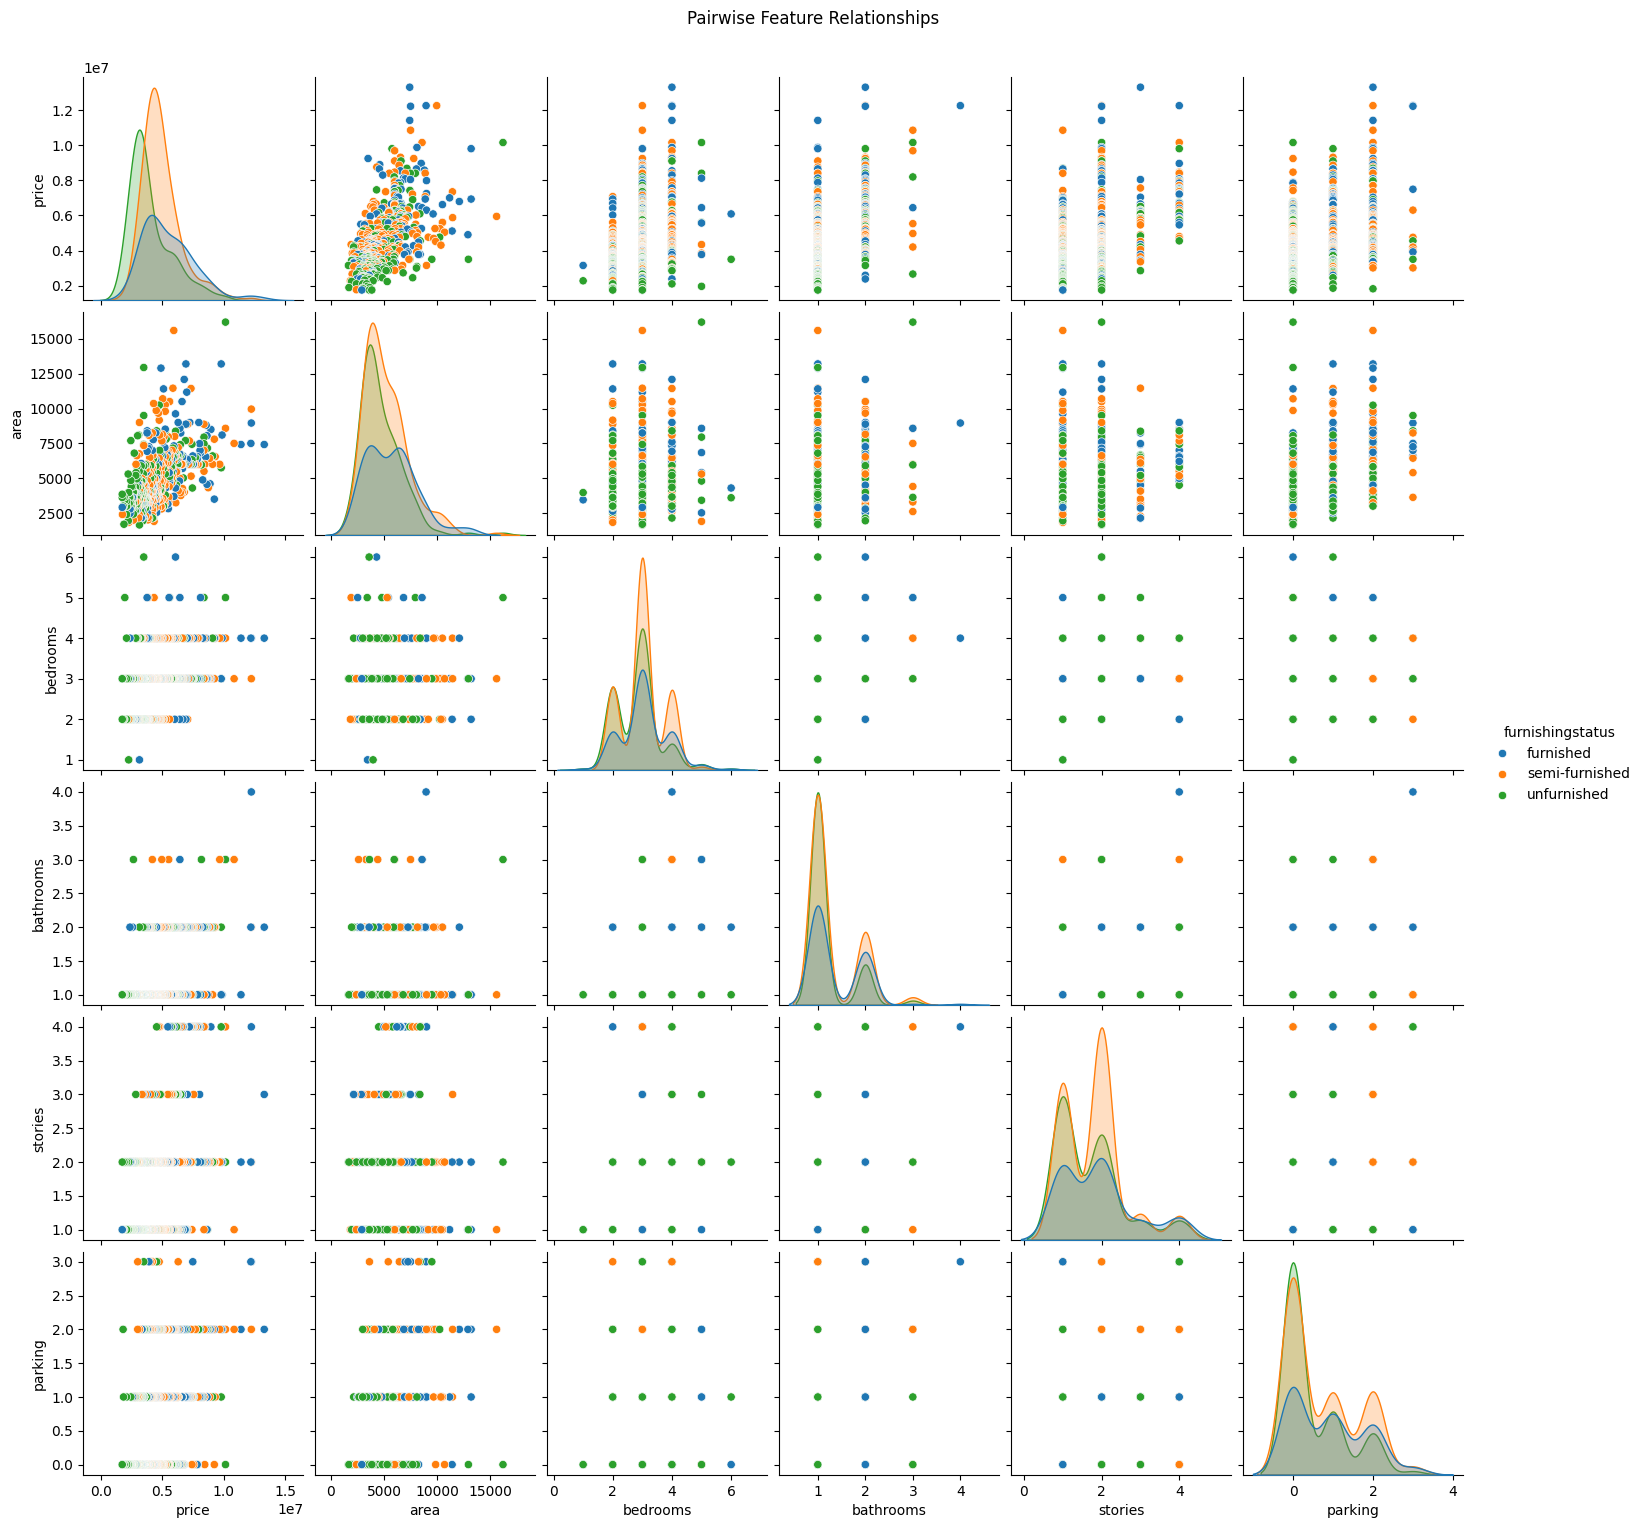

In [62]:
sns.pairplot(dataset, hue="furnishingstatus", diag_kind="kde")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


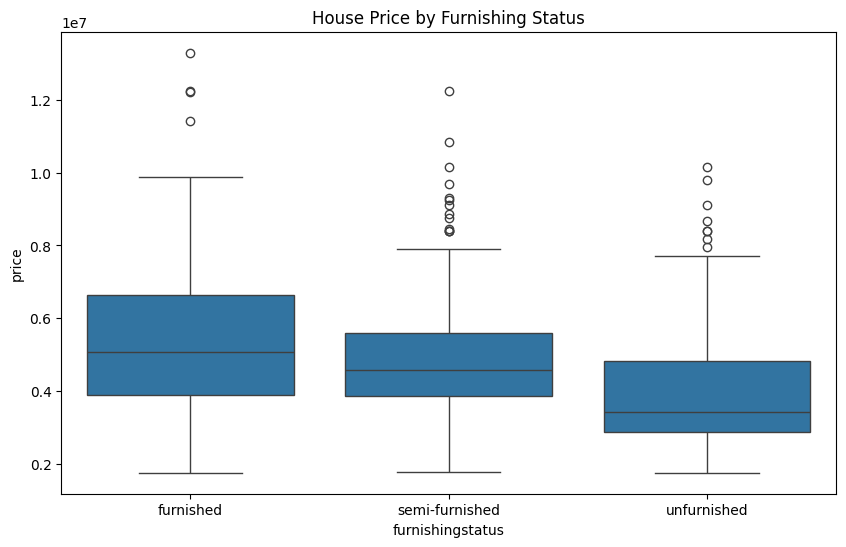

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x="furnishingstatus", y="price", data=dataset)
plt.title("House Price by Furnishing Status")
plt.show()


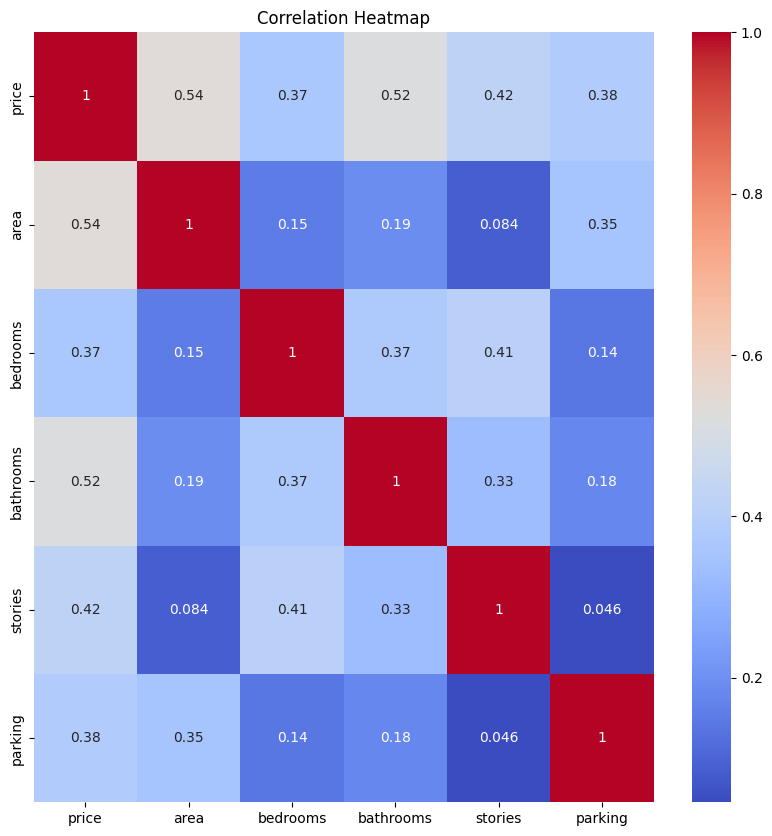

In [64]:
plt.figure(figsize=(10,10))
numeric_data=dataset.select_dtypes(include='int64')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [65]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [66]:
cat_data=x.select_dtypes(include="object")
num_data=x.select_dtypes(exclude="object")

In [67]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
en_data=dataset.select_dtypes(include="object")
pd.get_dummies(en_data)
pd.get_dummies(en_data).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   mainroad_no                      545 non-null    bool 
 1   mainroad_yes                     545 non-null    bool 
 2   guestroom_no                     545 non-null    bool 
 3   guestroom_yes                    545 non-null    bool 
 4   basement_no                      545 non-null    bool 
 5   basement_yes                     545 non-null    bool 
 6   hotwaterheating_no               545 non-null    bool 
 7   hotwaterheating_yes              545 non-null    bool 
 8   airconditioning_no               545 non-null    bool 
 9   airconditioning_yes              545 non-null    bool 
 10  prefarea_no                      545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_furnished       545 non-null    b

In [68]:
ohe=OneHotEncoder(drop='first')
arr=ohe.fit_transform(en_data).toarray()
arr

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(545, 8))

In [69]:
#encoded data
en_cols=ohe.get_feature_names_out(en_data.columns)
en_df=pd.DataFrame(arr, columns=en_cols)
en_df

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
x_final=pd.concat([num_data.reset_index(drop=True), en_df], axis=1)
x_final.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [71]:
#scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_final)
x_scaled=pd.DataFrame(sc.transform(x_final), columns=x_final.columns)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

100.0

In [74]:
lr.coef_

array([ 1.86872283e+06,  2.61298195e-10, -2.64418486e-11,  5.88124729e-10,
       -1.26751834e-10,  6.56878872e-11,  1.27691843e-10,  2.02936390e-10,
        7.99528969e-10,  8.97270205e-11,  2.89820000e-10,  1.05581875e-11,
       -1.44977580e-10,  3.49193411e-11])

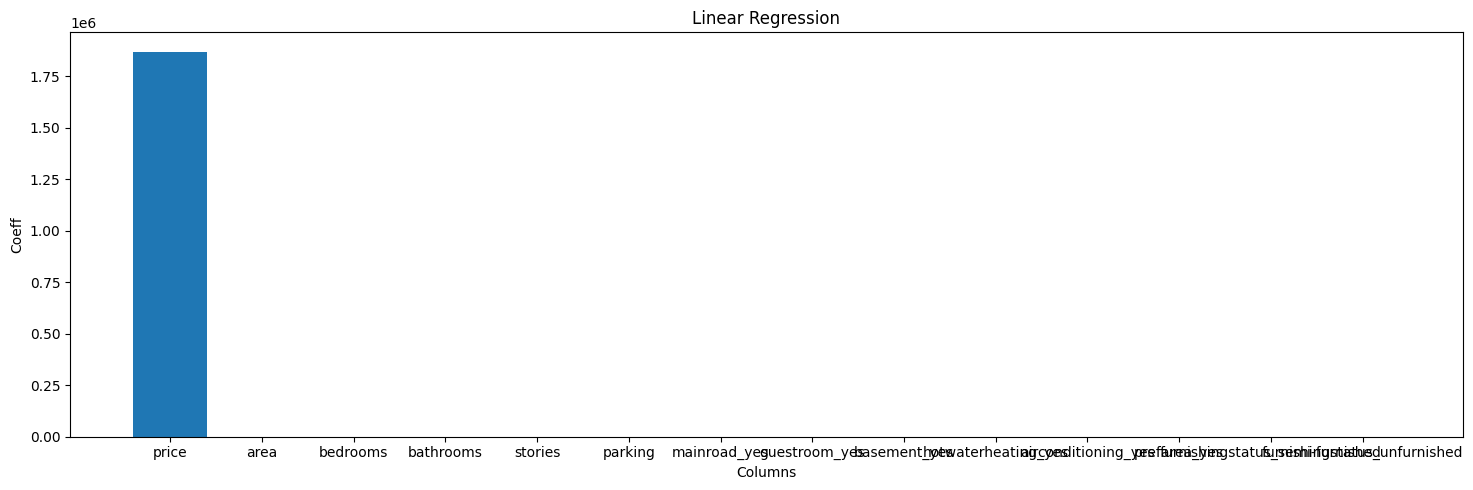

In [75]:
plt.figure(figsize=(15,5))
plt.bar(x_final.columns, lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.tight_layout()
plt.show()

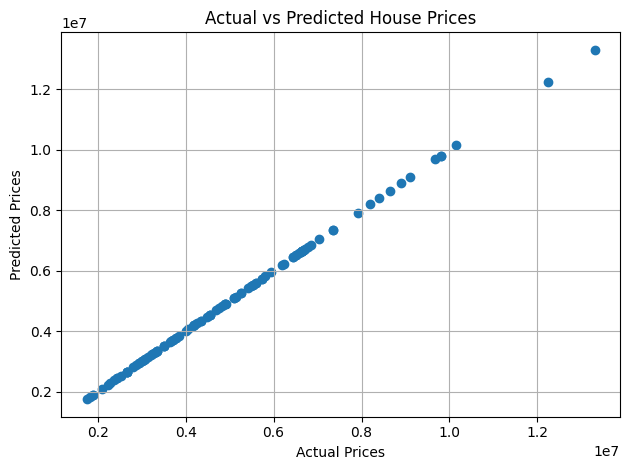

In [76]:
y_pred=lr.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

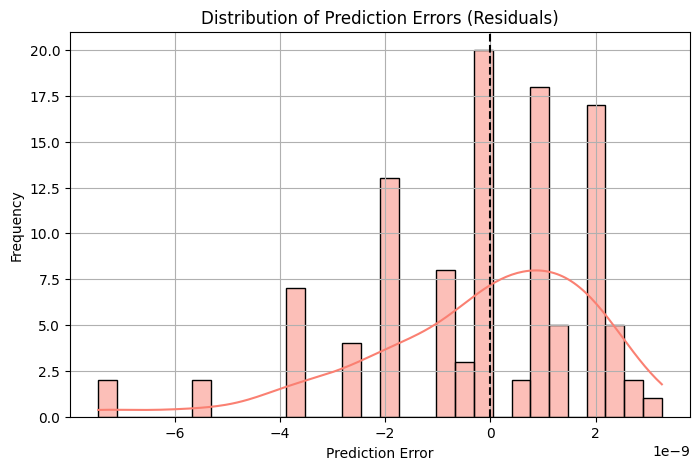

In [77]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="salmon")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [78]:
#decision tree regressor
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

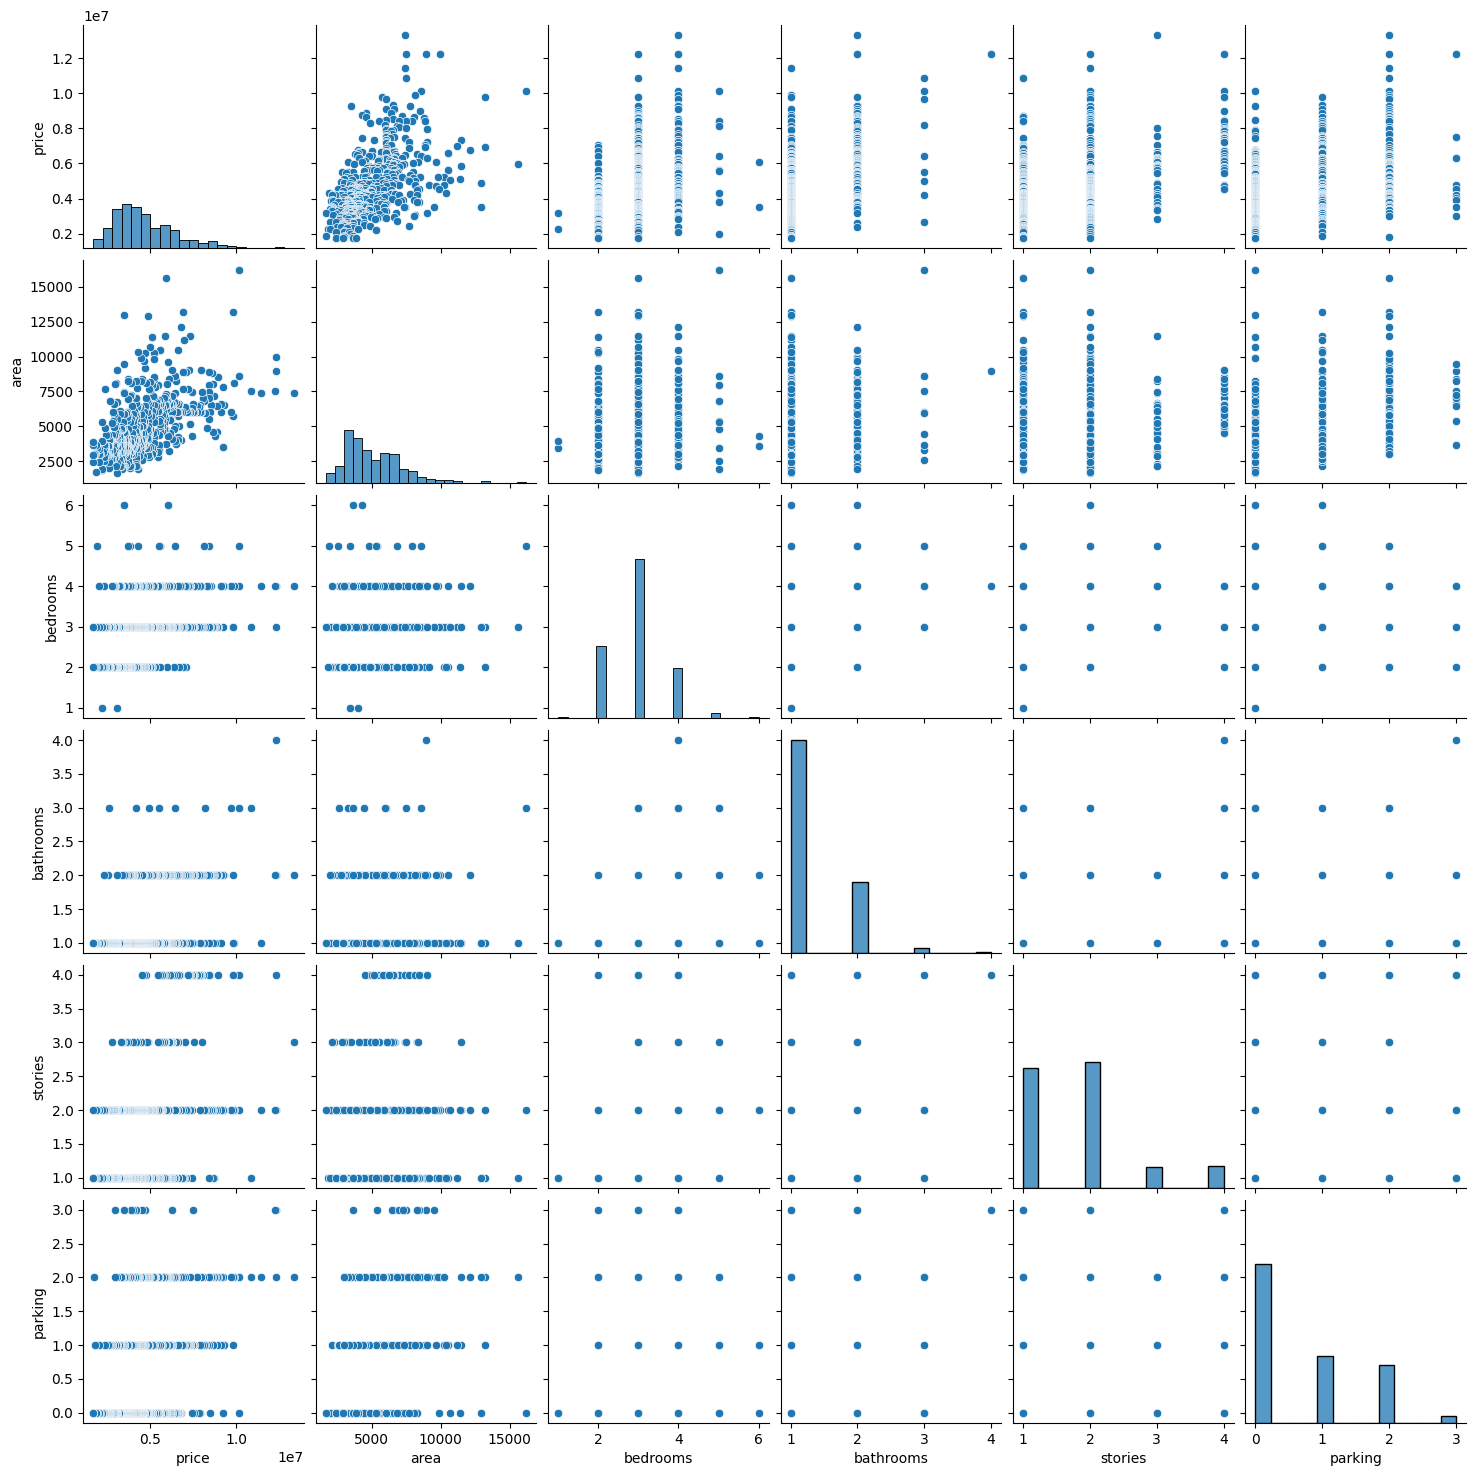

<Figure size 800x500 with 0 Axes>

In [126]:
#checking linearity
sns.pairplot(data=dataset)
plt.figure(figsize=(8,5))
plt.show()

In [81]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [82]:
x_train, x_test, y_train, y_test=train_test_split(x_final,y,test_size=0.2, random_state=42)

In [83]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [84]:
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(99.3169059641663, 100.0)

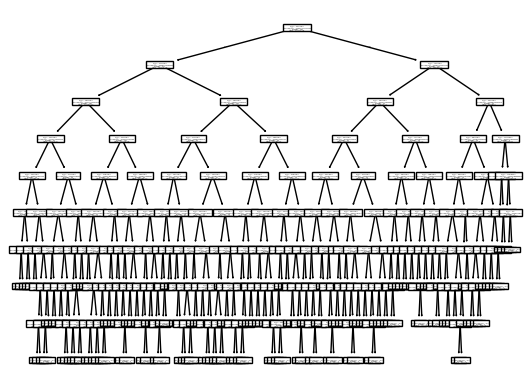

In [85]:
plot_tree(dt)
plt.show()

In [88]:
from sklearn.model_selection import RandomizedSearchCV

param_dist={
    "max_depth":[3,5,10,15,20,None],
    "min_samples_split":[2,5,10,20],
    "min_samples_leaf":[1,2,5,10],
    "max_features":[None,"sqrt","log2"]
}

In [89]:
rd=RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),param_distributions=param_dist, n_iter=20, cv=5, scoring="r2", n_jobs=-1, random_state=42)
rd.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 15, 20, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='r2')

In [90]:
best_tree=rd.best_estimator_

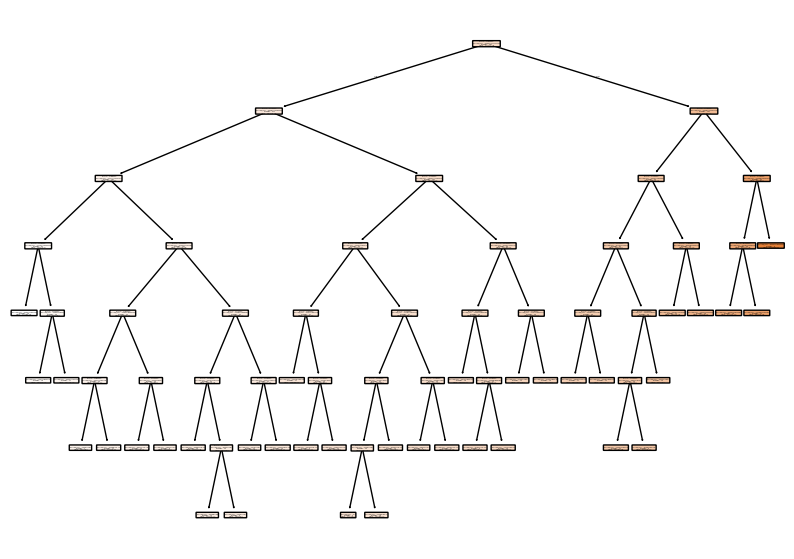

In [124]:
plt.figure(figsize=(10,7))
plot_tree(best_tree, feature_names=x_train.columns, filled=True, rounded=True)
plt.show()

In [105]:
#svr
from sklearn.svm import SVR
sv=SVR(kernel="linear")
sv.fit(x_train, y_train)

SVR(kernel='linear')

In [106]:
sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(-25.546589112951914, -144.93649672067397)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred=sv.predict(x_test)

In [108]:
r2_score(y_test, y_pred)

-0.2554658911295191

In [109]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2519095.182525419)

In [110]:
mean_absolute_error(y_test, y_pred)

2124228.266726319

In [111]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [112]:
knn.score(x_test, y_test)*100

99.64172906283625

In [113]:
knn.score(x_train, y_train)*100

99.98244665276282

In [117]:
y_pred_knn=knn.predict(x_test)


In [120]:
r2_score(y_test, y_pred_knn)*100


99.64172906283625

In [121]:
np.sqrt(mean_squared_error(y_test, y_pred_knn))

np.float64(134569.8933314336)

In [122]:
mean_absolute_error(y_test, y_pred_knn)

26719.4495412844